anagrams, anscombe, attention, brain_networks, car_crashes*, diamonds*, dots, exercise*, flights, fmri, gammas, geyser, iris*, mpg*, penguins*, planets, taxis*, tips*, titanic*

In [1]:
import seaborn as sns
#import squarify 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from pywaffle import Waffle
import plotly.graph_objects as go
from plotly.subplots import make_subplots
data = sns.load_dataset('penguins')
print(data.head()) 

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [25]:
print(data.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      344.000000     344.000000         344.000000   344.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.443643       1.969027          14.020657   799.613058
min         32.100000      13.100000         172.000000  2700.000000
25%         39.275000      15.600000         190.000000  3550.000000
50%         44.250000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [4]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True)
data['sex'].fillna(data['sex'].value_counts().index[0], inplace=True)
data.isnull().sum()


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [26]:
print(data.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen        39.10000       18.70000         181.000000   
1  Adelie  Torgersen        39.50000       17.40000         186.000000   
2  Adelie  Torgersen        40.30000       18.00000         195.000000   
3  Adelie  Torgersen        43.92193       17.15117         200.915205   
4  Adelie  Torgersen        36.70000       19.30000         193.000000   

   body_mass_g     sex  
0  3750.000000    Male  
1  3800.000000  Female  
2  3250.000000  Female  
3  4201.754386    Male  
4  3450.000000  Female  


In [7]:
#Options are below for plots using Seaborn. Examples in following blocks.
'''
(data, kind, x, y, style, col, size, ci, row, hue, palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)
viz = sns.relplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    data=data.query(use " " and/or),    #Want to slice out any part of it for this viz?     
    kind = "line",                      #Plot type [relplot (line, scatter), catplot (strip, box, violin, boxen, point, bar, count, swarm)
                                        displot (hist, kde, ecdf), lmplot, regplot, residplot, heatmap, clustermap]
    x = "flipper_length_mm",            #What is your X
    y = "bill_length_mm",               #What is your Y   
    style = ,                           #Similar to hue, set marker style based on category
    col = "species",                    #Want to break out into small multiples vertically?    
    size = ,                            #Automatically normalized into ranges, size of marker or line by value
    ci = "sd",                          #Confidence interval for line plots ["none", "sd"]    
    row = ,                             #Use row with or instead of col    
    hue = "sex",                        #Want to color by a 3rd feature? Lineplot shows multiple lines. Or,    
    palette = {" " : " ", " " : " "}    #Want to specify colors for each category?
    order = [" ", " "],                 #Order your categories explicitly, or data = data.sort_values("feature")
    orient = "h",                       #Want to swap x and y?     
    height = , aspect = ,               #Want to set the height and width?    
    markers = ["^", "o"],               #Want some cool markers?
    linestyles = ["--"]                 #Want some cool linestyles? Line plot shows multiple lines.
    split = True,                       #Use to split violin plot into two hues
    inner = "stick"                     #Use to add value markers inside violin plot
    col_wrap = 5                        #Wraps values in small multiples of 5 columns, across many values    
    )

viz.set_axis_labels("Flipper length", "Bill length")
viz.set(xscale = "log")                 #Use to convert x to log scale
viz.figure.autofmt_xdate()              #Use when plotting time series, to format date
viz2 = sns.type(args, ax = viz.ax)      #Use to add a second type of plot to the same axis
'''

'\n(data, kind, x, y, style, col, size, ci, row, hue, palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)\nviz = sns.relplot(                      #What category of plot (catplot, relplot, displot)\n    data=data,                          #What is your dataset?\n    data=data.query(use " " and/or),    #Want to slice out any part of it for this viz?     \n    kind = "line",                      #Plot type [relplot (line, scatter), catplot (strip, box, violin, boxen, point, bar, count, swarm)\n                                        displot (hist, kde, ecdf), lmplot, regplot, residplot, heatmap, clustermap]\n    x = "flipper_length_mm",            #What is your X\n    y = "bill_length_mm",               #What is your Y   \n    style = ,                           #Similar to hue, set marker style based on category\n    col = "species",                    #Want to break out into small multiples vertically?    \n    size = ,                            #Autom

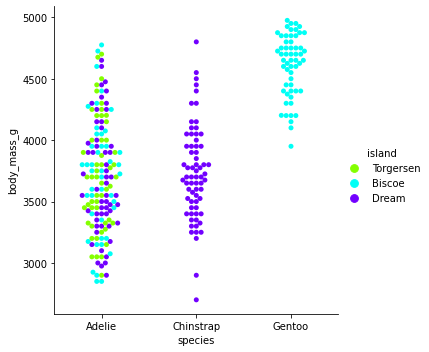

In [8]:
#viz = sns.<typeplot>(data, kind, x, y, style, col, size, ci, row, hue, 
# palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)
viz = sns.catplot(
    x = "species", y = "body_mass_g",
    kind = "swarm",
    hue = "island",
    palette = "hsv",
    data = data.query("body_mass_g > 3500" and "body_mass_g < 5000")
)

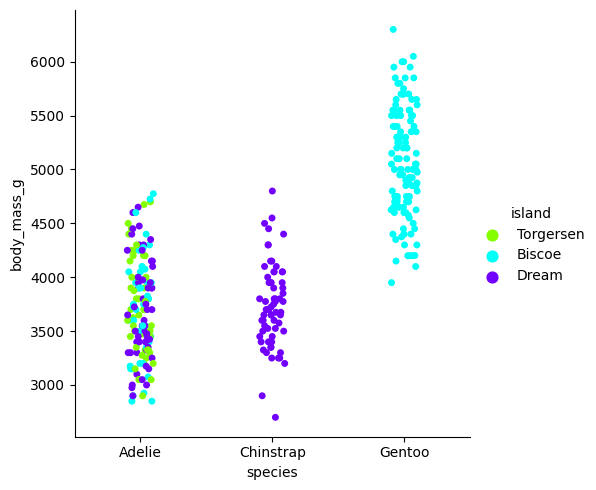

In [9]:
#viz = sns.<typeplot>(data, kind, x, y, style, col, size, ci, row, hue, 
# palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)

viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "strip",                      #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "species",
    y = "body_mass_g",
    hue = "island",
    palette = "hsv"
)

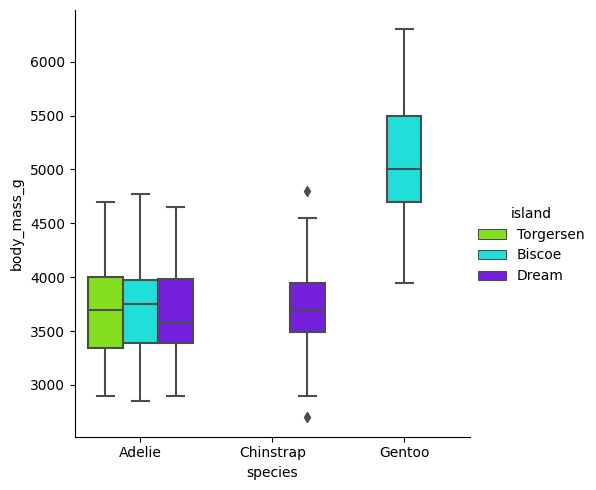

In [10]:
#viz = sns.<typeplot>(data, kind, x, y, style, col, size, ci, row, hue, 
# palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)

viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "box",                      #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "species",
    y = "body_mass_g",
    hue = "island",
    palette = "hsv"
)

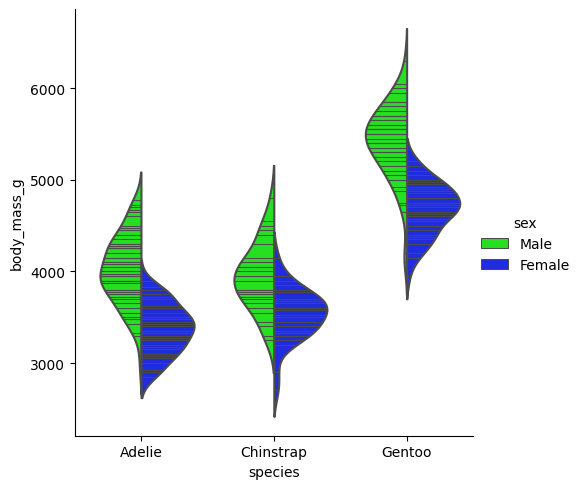

In [11]:
#viz = sns.<typeplot>(data, kind, x, y, style, col, size, ci, row, hue, 
# palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)

viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "violin",                    #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "species",
    y = "body_mass_g",
    hue = "sex",
    split = True,
    inner = "stick",
    palette = "hsv"
)

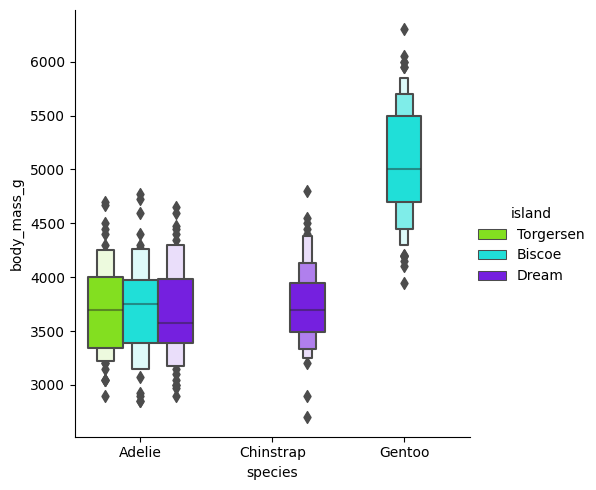

In [12]:
#viz = sns.<typeplot>(data, kind, x, y, style, col, size, ci, row, hue, 
# palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)

viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "boxen",                      #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "species",
    y = "body_mass_g",
    hue = "island",
    palette = "hsv"
)

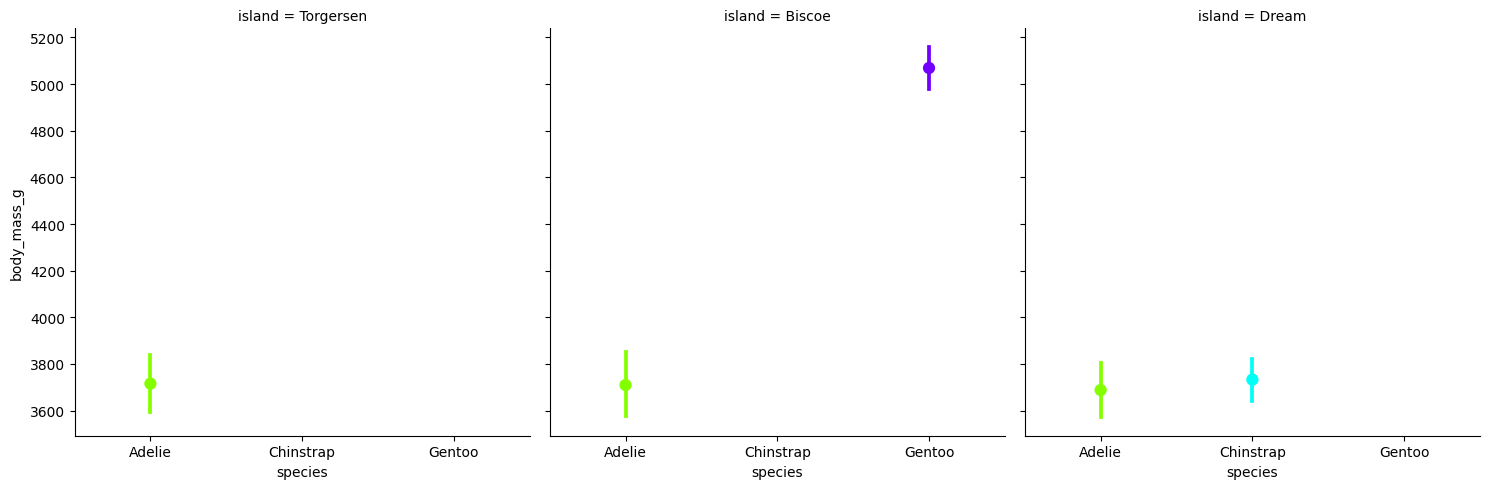

In [13]:
#viz = sns.<typeplot>(data, kind, x, y, style, col, size, ci, row, hue, 
# palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)

viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "point",                      #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "species",
    y = "body_mass_g",
    col = "island",
    palette = "hsv"
)

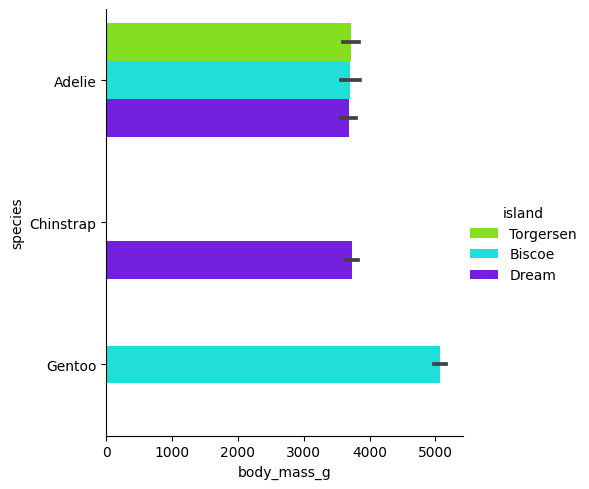

In [14]:
#viz = sns.<typeplot>(data, kind, x, y, style, col, size, ci, row, hue, 
# palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)

viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "bar",                      #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "body_mass_g",
    y = "species",
    hue = "island",
    orient = "h",
    palette = "hsv"
)

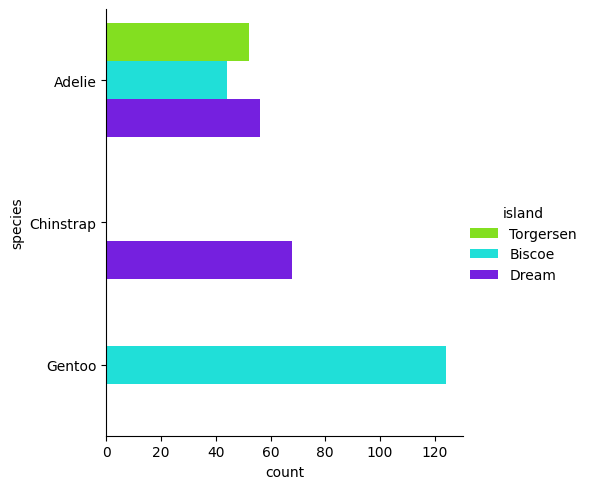

In [15]:
#viz = sns.<typeplot>(data, kind, x, y, style, col, size, ci, row, hue, 
# palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)

viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "count",                     #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    y = "species",
    #y = "body_mass_g",
    hue = "island",
    orient = "h",
    palette = "hsv"
)

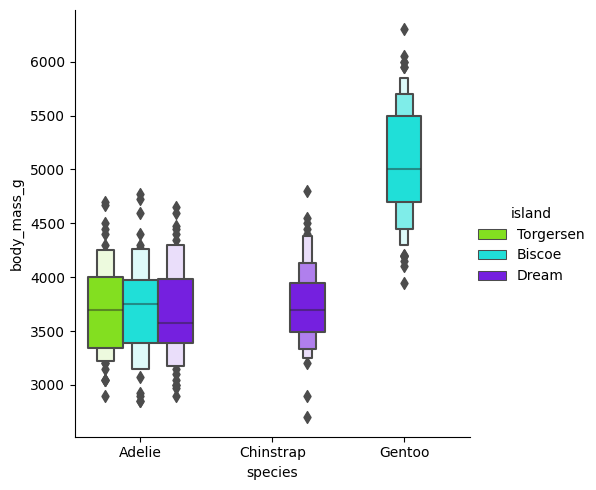

In [16]:
#viz = sns.<typeplot>(data, kind, x, y, style, col, size, ci, row, hue, 
# palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)

viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "boxen",                      #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "species",
    y = "body_mass_g",
    hue = "island",
    palette = "hsv"
)

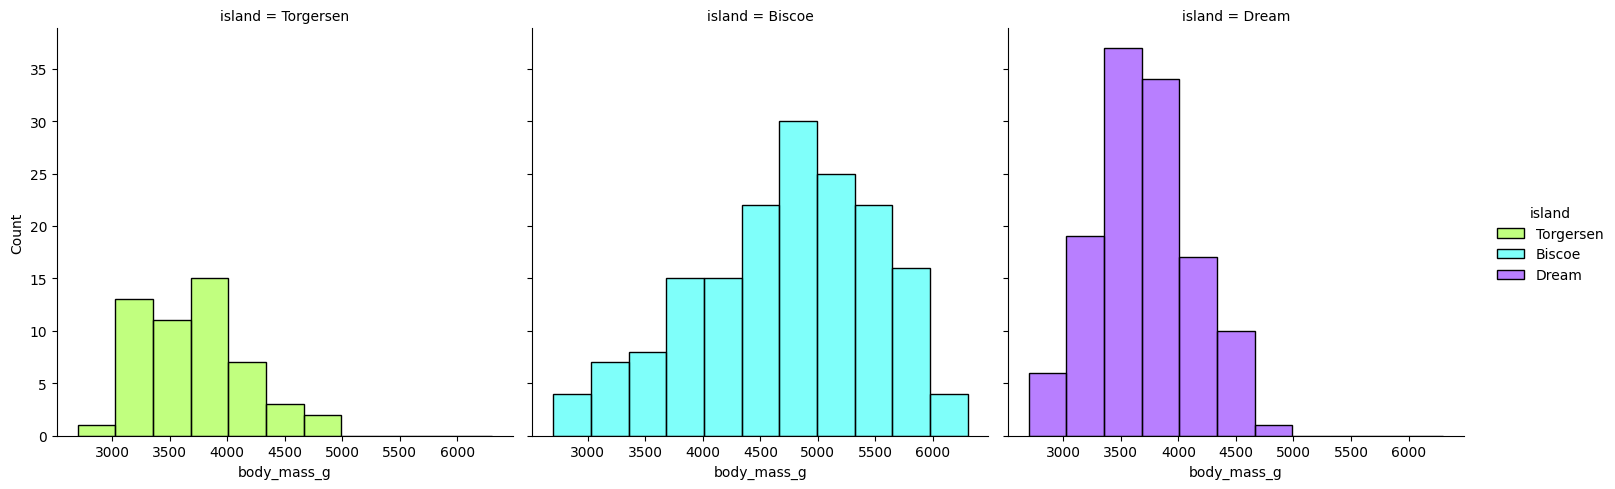

In [17]:
#(data, kind, x, y, style, col, size, ci, row, hue, palette, order, orient, height, 
# aspect, markers, linestyles, split, inner, col_wrap)

viz = sns.displot(                      #What category of plot (catplot, relplot, displot)
    data = data,                          #What is your dataset?
    kind = "hist",                     #Plot type [displot (hist, kde, ecdf)]
    #x = "species",
    col = "island",
    x = "body_mass_g",                  #To make graphs horizontal, simply change x to y
    hue = "island",
    palette = "hsv"
)

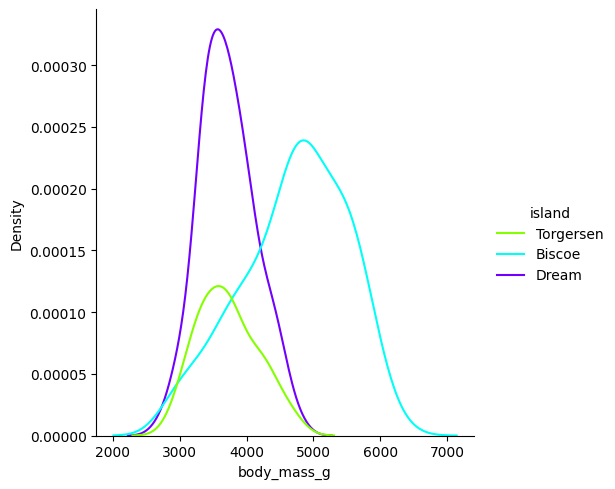

In [18]:
#(data, kind, x, y, style, col, size, ci, row, hue, palette, order, orient, height, 
# aspect, markers, linestyles, split, inner, col_wrap)

viz = sns.displot(                      #What category of plot (catplot, relplot, displot)
    data = data,                          #What is your dataset?
    kind = "kde",                     #Plot type [displot (hist, kde, ecdf)]
    #x = "species",
    x = "body_mass_g",                  #To make graphs horizontal, simply change x to y
    hue = "island",
    palette = "hsv"
)

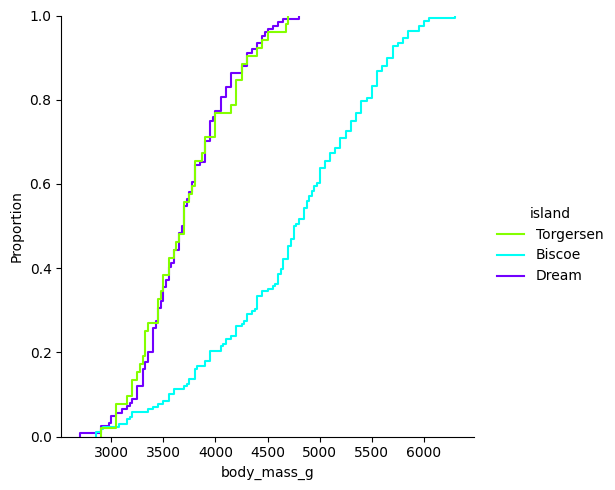

In [19]:
#(data, kind, x, y, style, col, size, ci, row, hue, palette, order, orient, height, 
# aspect, markers, linestyles, split, inner, col_wrap)

viz = sns.displot(                      #What category of plot (catplot, relplot, displot)
    data = data,                          #What is your dataset?
    kind = "ecdf",                     #Plot type [displot (hist, kde, ecdf)]
    #x = "species",
    x = "body_mass_g",                  
    hue = "island",
    palette = "hsv"
)

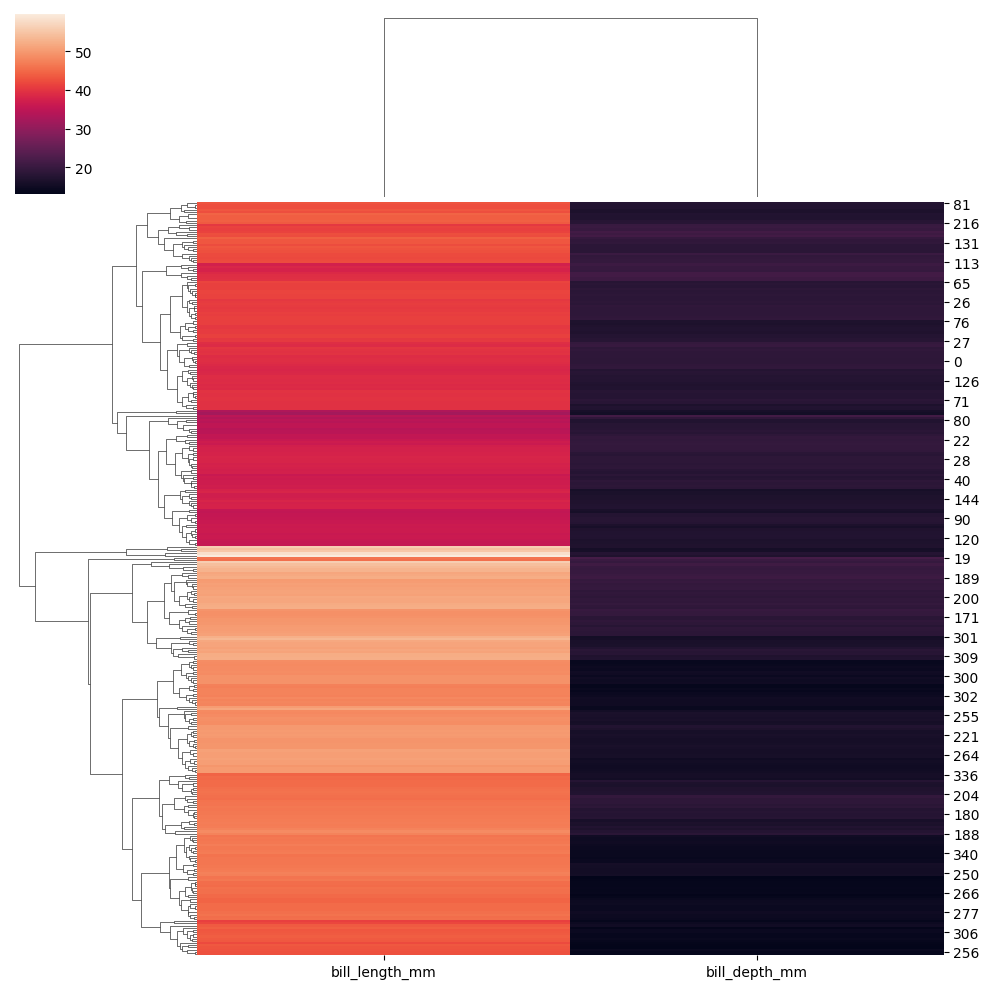

In [20]:
#(data, kind, x, y, style, col, size, ci, row, hue, palette, order, orient, height, 
# aspect, markers, linestyles, split, inner, col_wrap)
#bill length and depth, flipper length, body mass

viz = sns.clustermap(
    data = data.drop(["species", "island", "sex", "body_mass_g", "flipper_length_mm"], axis = 1)
)

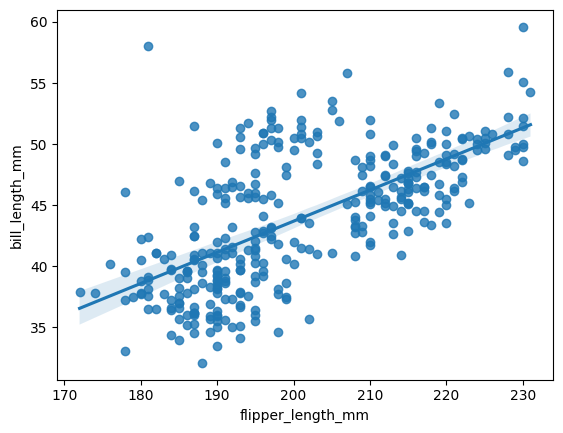

In [21]:
#This type of plot does not use the Seaborn arguments like "hue"
#Consult Seaborn site for this type of plot

viz = sns.regplot(
    data = data,
    x = "flipper_length_mm",
    y = "bill_length_mm",
    ci = 99,
)

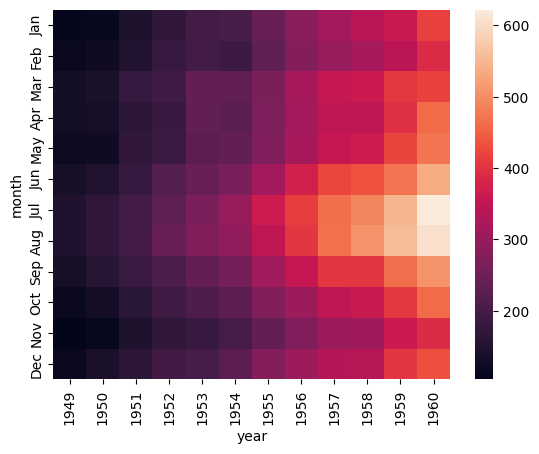

In [22]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)


In [23]:
#Create groups to compare across. There are approaches that don't require pre-grouping, but some do (eg. treemap).
#Bill length by species, island and sex
#Bill depth by species, island and sex 
#Body mass by species, island and sex
#Flipper length by species, island and sex
species_count = data.groupby('species')[['species']].count()
sex_count = data.groupby('sex')[['sex']].count()
island_count = data.groupby('island')[['island']].count()
species_billlen = data.groupby('species')[['bill_length_mm']].mean()
species_billdep = data.groupby('species')[['bill_depth_mm']].mean()
species_flipperlen = data.groupby('species')[['flipper_length_mm']].mean()
species_bodymass = data.groupby('species')[['body_mass_g']].mean()
island_billlen = data.groupby('island')[['bill_length_mm']].mean()
island_billdep = data.groupby('island')[['bill_depth_mm']].mean()
island_flipperlen = data.groupby('island')[['flipper_length_mm']].mean()
island_bodymass = data.groupby('island')[['body_mass_g']].mean()
sex_billlen = data.groupby('sex')[['bill_length_mm']].mean()
sex_billdep = data.groupby('sex')[['bill_depth_mm']].mean()
sex_flipperlen = data.groupby('sex')[['flipper_length_mm']].mean()
sex_bodymass = data.groupby('sex')[['body_mass_g']].mean()
print(island_bodymass)


           body_mass_g
island                
Biscoe     4712.956871
Dream      3712.903226
Torgersen  3715.899123


In [27]:
#CREATING COLORMAPS

cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

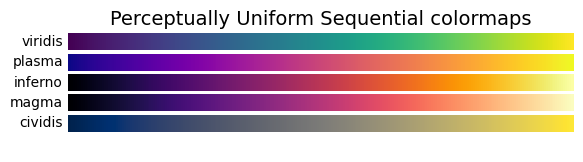

In [28]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

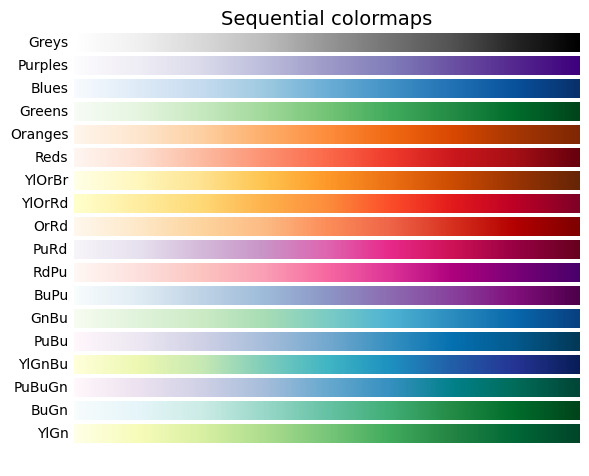

In [29]:
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

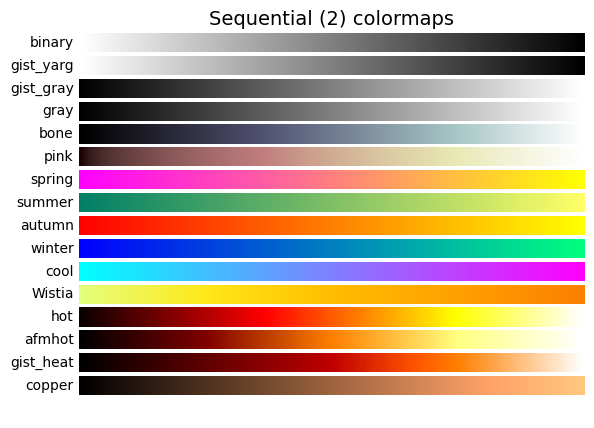

In [30]:
plot_color_gradients('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])

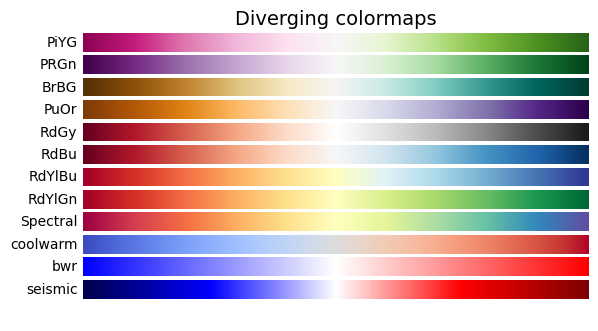

In [31]:
plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])

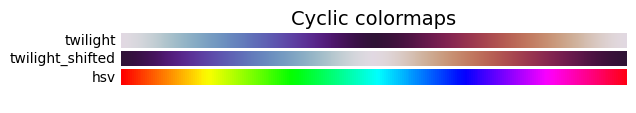

In [32]:
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])

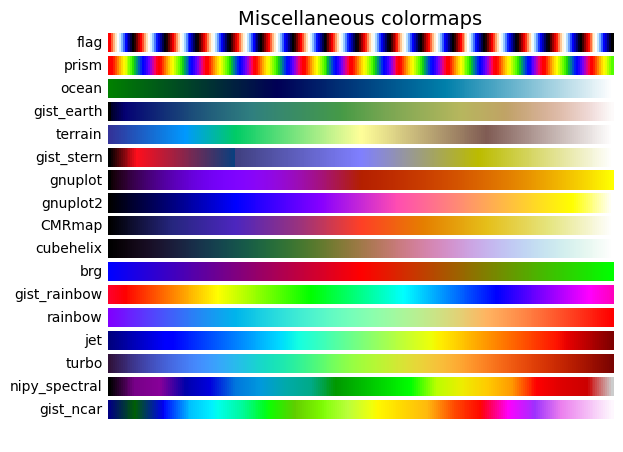

In [33]:
plot_color_gradients('Miscellaneous',
                     ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar'])

plt.show()
